<a href="https://colab.research.google.com/github/Rkipz19/AI-Coursework-2025/blob/main/Stars_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #testing out model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Stars.csv to Stars.csv


In [ ]:
df = pd.read_csv('Stars.csv')
df

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,0,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,0,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,0,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,0,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,5,Hypergiant,White,A


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (K)          240 non-null    int64  
 1   Luminosity (L/Lo)        240 non-null    float64
 2   Radius (R/Ro)            240 non-null    float64
 3   Absolute magnitude (Mv)  240 non-null    float64
 4   Star type                240 non-null    int64  
 5   Star category            240 non-null    object 
 6   Star color               240 non-null    object 
 7   Spectral Class           240 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 15.1+ KB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Temperature (K),0
Luminosity (L/Lo),0
Radius (R/Ro),0
Absolute magnitude (Mv),0
Star type,0
Star category,0
Star color,0
Spectral Class,0


<Axes: >

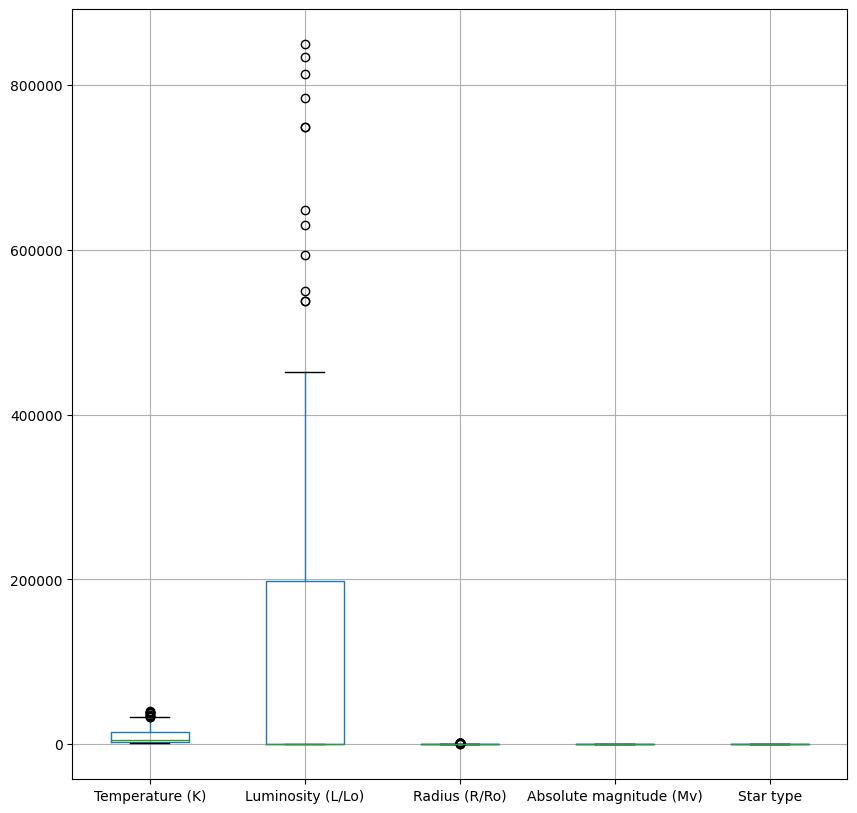

In [ ]:
df.boxplot(figsize=(10,10))

In [ ]:
df.describe()

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [ ]:
AQ1 = df['Absolute magnitude (Mv)'].quantile(0.25)
AQ3 = df['Absolute magnitude (Mv)'].quantile(0.75)

RQ1 = df['Radius (R/Ro)'].quantile(0.25)
RQ3 = df['Radius (R/Ro)'].quantile(0.75)

LQ1 = df['Luminosity (L/Lo)'].quantile(0.25)
LQ3 = df['Luminosity (L/Lo)'].quantile(0.75)

TQ1 = df['Temperature (K)'].quantile(0.25)
TQ3 = df['Temperature (K)'].quantile(0.75)
print("Absolute magnitude (Mv) quatile is: ",AQ1,',',AQ3)
print("Radius (R/Ro) quatile is: ",RQ1,',',RQ3)
print("Luminosity (L/Lo) quatile is: ",LQ1,',',LQ3)
print("Temperature (K) quatile is: ",TQ1,',',TQ3)

Absolute magnitude (Mv) quatile is:  -6.2325 , 13.6975
Radius (R/Ro) quatile is:  0.10275 , 42.75
Luminosity (L/Lo) quatile is:  0.0008647500000000001 , 198050.0
Temperature (K) quatile is:  3344.25 , 15055.5


In [ ]:
TIQR = TQ3 - TQ1
RIQR = RQ3 - RQ1
LIQR = LQ3 - LQ1
AIQR = AQ3 - AQ1
print("Absolute magnitude (Mv) interquatile range is: ",AIQR)
print("Radius (R/Ro) interquatile range is: ",RIQR)
print("Luminosity (L/Lo) interquatile range is: ",LIQR)
print("Temperature (K) interquatile range is: ",TIQR)

Absolute magnitude (Mv) interquatile range is:  19.93
Radius (R/Ro) interquatile range is:  42.64725
Luminosity (L/Lo) interquatile range is:  198049.99913525
Temperature (K) interquatile range is:  11711.25


In [ ]:
Alower_limit =   AQ1 - 1.5*AIQR
Aupper_limit =   AQ3 + 1.5*AIQR

Tlower_limit =   TQ1 - 1.5*TIQR
Tupper_limit =   TQ3 + 1.5*TIQR

Llower_limit =   LQ1 - 1.5*LIQR
Lupper_limit =   LQ3 + 1.5*LIQR

Rlower_limit =   RQ1 - 1.5*RIQR
Rupper_limit =   RQ3 + 1.5*RIQR

print("Absolute magnitude (Mv) lower limit is: ",Alower_limit)
print("Absolute magnitude (Mv) upper limit is: ",Aupper_limit)
print("\nRadius (R/Ro) lower limit is: ",Rlower_limit)
print("Radius (R/Ro) upper limit is: ",Rupper_limit)
print("\nLuminosity (L/Lo) lower limit is: ",Llower_limit)
print("Luminosity (L/Lo) upper limit is: ",Lupper_limit)
print("\nTemperature (K) lower limit is: ",Tlower_limit)
print("Temperature (K) upper limit is: ",Tupper_limit)

Absolute magnitude (Mv) lower limit is:  -36.1275
Absolute magnitude (Mv) upper limit is:  43.5925

Radius (R/Ro) lower limit is:  -63.868125
Radius (R/Ro) upper limit is:  106.720875

Luminosity (L/Lo) lower limit is:  -297074.997838125
Luminosity (L/Lo) upper limit is:  495124.998702875

Temperature (K) lower limit is:  -14222.625
Temperature (K) upper limit is:  32622.375


In [ ]:
df[(df['Temperature (K)']<Tlower_limit)|(df['Temperature (K)']>Tupper_limit)|(df['Radius (R/Ro)']<Rlower_limit)|(df['Radius (R/Ro)']>Rupper_limit)|(df['Luminosity (L/Lo)']<Llower_limit)|(df['Luminosity (L/Lo)']>Lupper_limit)|(df['Absolute magnitude (Mv)']<Alower_limit)|(df['Absolute magnitude (Mv)']>Aupper_limit)]

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class
30,39000,204000.0,10.60,-4.700,3,Main Sequence,Blue,O
49,33750,220000.0,26.00,-6.100,4,Supergiant,Blue,B
50,3490,270000.0,1520.00,-9.400,5,Hypergiant,Red,M
51,3750,283000.0,1260.00,-7.630,5,Hypergiant,Red,M
52,3834,272000.0,1183.00,-9.200,5,Hypergiant,Red,M
53,3749,550000.0,1648.00,-8.050,5,Hypergiant,Orange,M
54,3650,310000.0,1324.00,-7.790,5,Hypergiant,Red,M
55,3450,263000.0,1349.00,-11.750,5,Hypergiant,Red,M
56,3660,363000.0,1673.00,-11.920,5,Hypergiant,Red,M
57,3450,174000.0,1284.00,-11.280,5,Hypergiant,Red,M


In [ ]:
df_no_outlier = df[(df['Temperature (K)']>Tlower_limit)&(df['Temperature (K)']<Tupper_limit)&(df['Radius (R/Ro)']>Rlower_limit)&(df['Radius (R/Ro)']<Rupper_limit)&(df['Luminosity (L/Lo)']>Llower_limit)&(df['Luminosity (L/Lo)']<Lupper_limit)&(df['Absolute magnitude (Mv)']>Alower_limit)&(df['Absolute magnitude (Mv)']<Aupper_limit)]
df_no_outlier

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class
0,3068,0.002400,0.1700,16.120,0,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.600,0,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.700,0,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.650,0,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.060,0,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...,...
221,12749,332520.000000,76.0000,-7.020,4,Supergiant,Blue,O
222,9383,342940.000000,98.0000,-6.980,4,Supergiant,Blue,O
224,16787,246730.000000,62.0000,-6.350,4,Supergiant,Blue,O
225,18734,224780.000000,46.0000,-7.450,4,Supergiant,Blue,O


In [ ]:
df.nunique()

,0
Temperature (K),228
Luminosity (L/Lo),208
Radius (R/Ro),216
Absolute magnitude (Mv),228
Star type,6
Star category,6
Star color,19
Spectral Class,7


Q2: EDA

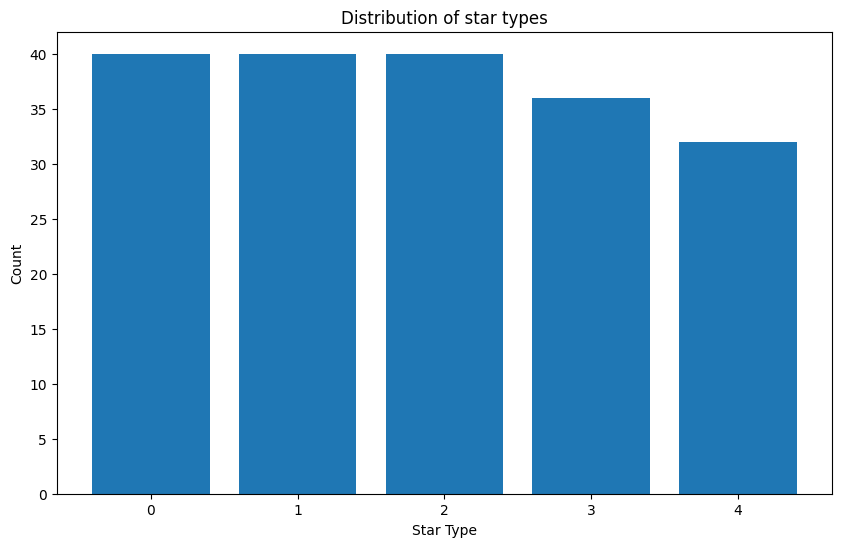

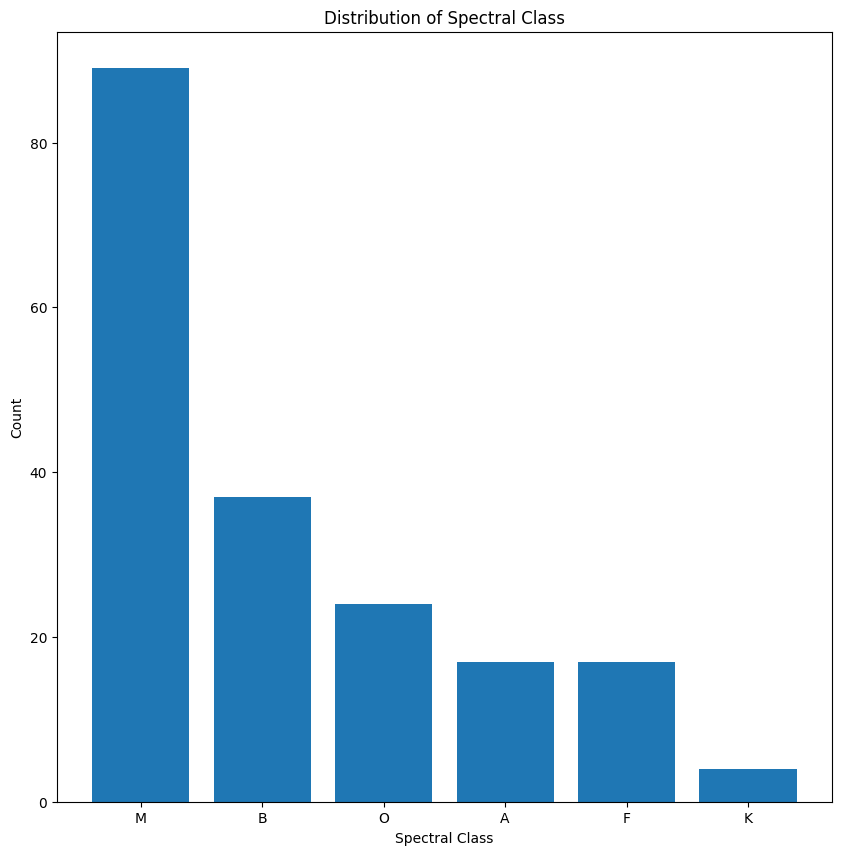

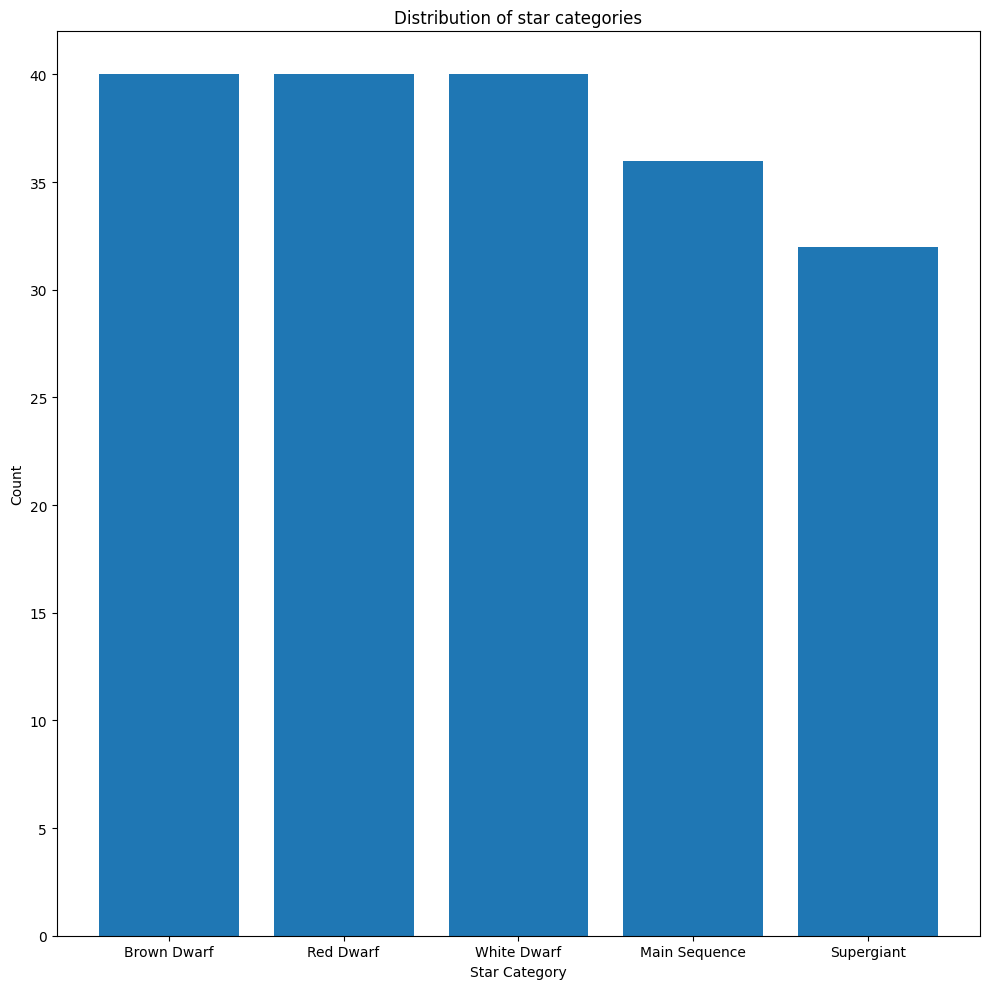

In [ ]:
st = df_no_outlier['Star type']
st_data = st.value_counts()

plt.figure(figsize=(10,6))
plt.bar(st_data.index, st_data.values)
plt.title('Distribution of star types')
plt.xlabel('Star Type')
plt.ylabel('Count')
plt.show()

sclass = df_no_outlier['Spectral Class']
sclass_data = sclass.value_counts()

plt.figure(figsize=(10,10))
plt.bar(sclass_data.index, sclass_data.values)
plt.title('Distribution of Spectral Class')
plt.xlabel('Spectral Class')
plt.ylabel('Count')
plt.show()

sc = df_no_outlier['Star category']
sc_data = sc.value_counts()

plt.figure(figsize=(10,10))
plt.bar(sc_data.index, sc_data.values)
plt.title('Distribution of star categories')
plt.xlabel('Star Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


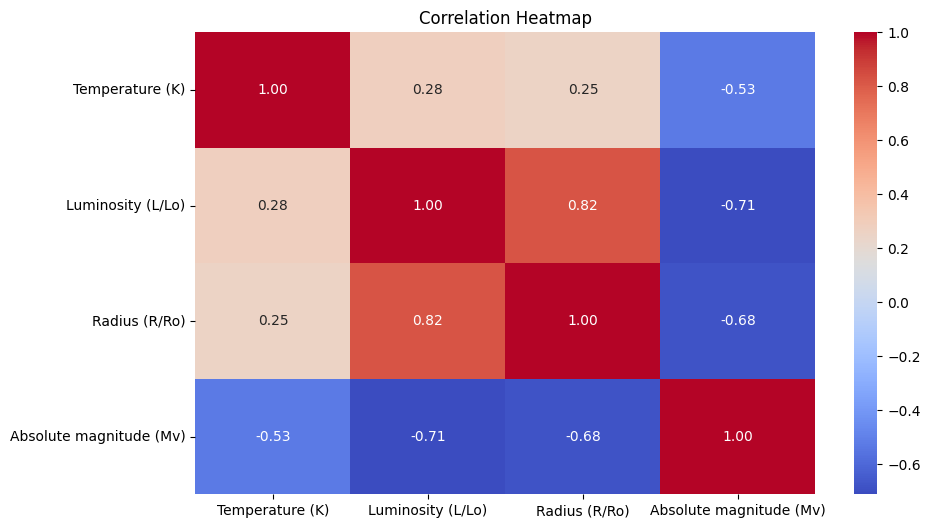

In [ ]:
corr = df_no_outlier[['Temperature (K)','Luminosity (L/Lo)','Radius (R/Ro)','Absolute magnitude (Mv)']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True,cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
fig = px.scatter(
    df_no_outlier,
    x='Absolute magnitude (Mv)',
    y='Radius (R/Ro)',
    color='Star type',
    title='Star bubble chart(Absolute magnitude (Mv) and Radius(R/Ro))',
    size_max=40
)

fig.show()

In [ ]:
fig = px.scatter(
    df_no_outlier,
    x='Luminosity (L/Lo)',
    y= 'Radius (R/Ro)',
    color='Star category',
    title='Star bubble chart(Luminosity and Radius)',
    size_max=40
)
fig.show()

In [ ]:
fig = px.scatter(
    df_no_outlier,
    x='Temperature (K)',
    y='Radius (R/Ro)',
    color='Spectral Class',
    title='Star bubble chart(Temperature and Radius (R/Ro)',
    size_max=40
)
fig.show()

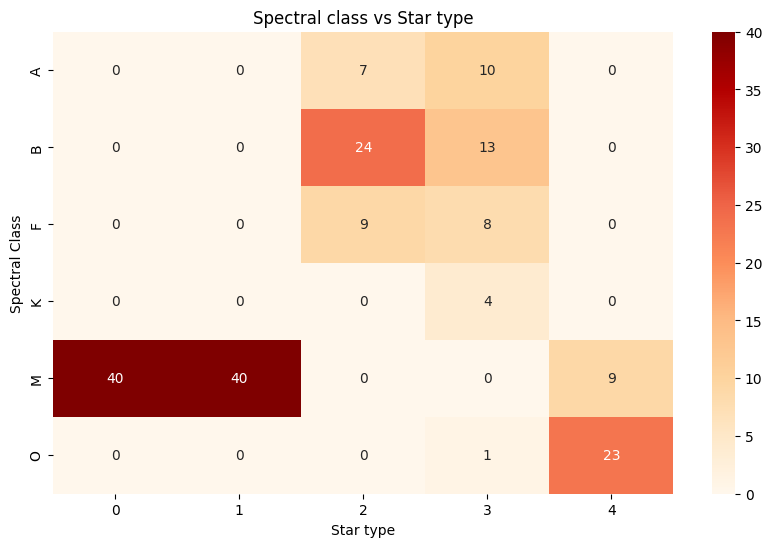

In [ ]:
plt.figure(figsize=(10,6))
spectral_cross = pd.crosstab(df_no_outlier['Spectral Class'],df_no_outlier['Star type'])
sns.heatmap(
    spectral_cross,
    annot=True,
    cmap='OrRd',
    fmt='d'
)
plt.title('Spectral class vs Star type')
plt.xlabel('Star type')
plt.ylabel('Spectral Class')
plt.show()

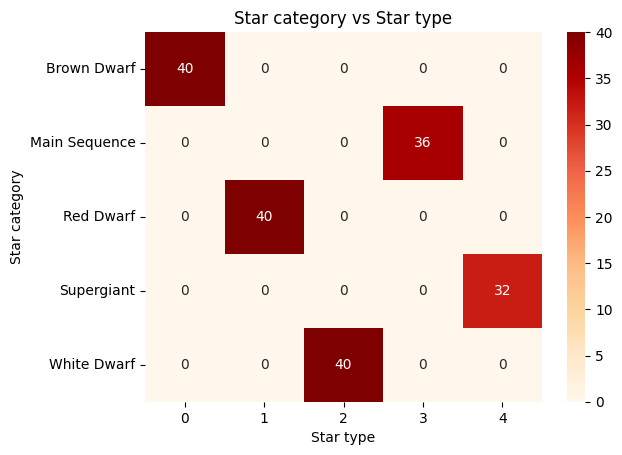

In [ ]:
star_category_cross = pd.crosstab(df_no_outlier['Star category'],df_no_outlier['Star type'])
sns.heatmap(
    star_category_cross,
    annot=True,
    cmap='OrRd',
    fmt = 'd'
)
plt.title('Star category vs Star type')
plt.xlabel('Star type')
plt.ylabel('Star category')
plt.show()

Q3: K-Nearest Neighbours algorithm

In [ ]:
#Mutual information measures how much information a feature gives you about a target
X = df_no_outlier[['Temperature (K)','Luminosity (L/Lo)','Radius (R/Ro)','Absolute magnitude (Mv)']]
y = df_no_outlier['Spectral Class']

mutual_info = mutual_info_classif(X,y)


X1 = df_no_outlier[['Temperature (K)','Luminosity (L/Lo)','Radius (R/Ro)','Absolute magnitude (Mv)']]
Y1 = df_no_outlier['Star type']

mutual_info1 = mutual_info_classif(X1,Y1)


x2 = df_no_outlier[['Temperature (K)','Luminosity (L/Lo)','Radius (R/Ro)','Absolute magnitude (Mv)']]
y2 = df_no_outlier['Star category']

mutual_info2 = mutual_info_classif(x2,y2)
print("This mutual info for target spectral class",mutual_info)
print("This is the mutual info for target star type",mutual_info1)
print("This is the mutual info for target star category",mutual_info2)

This mutual info for target spectral class [0.91643482 0.83250893 0.92534115 0.82396138]
This is the mutual info for target star type [0.64832933 1.01076307 1.52566313 1.32986404]
This is the mutual info for target star category [0.64978186 1.01388101 1.52756916 1.33134158]


In [ ]:
#Our target variable is Star Category and the two features we choose are Radius and Absolute magnitude since they have the highest mutual info to Star category
#split dataset
A = df_no_outlier[['Radius (R/Ro)', 'Absolute magnitude (Mv)']]
b = df_no_outlier['Star category']
A_train, A_test, b_train, b_test = train_test_split(A, b, random_state = 42, test_size=0.2)

In [ ]:
#feature scaling
scaler = StandardScaler()
A_train = scaler.fit_transform(A_train)
A_test = scaler.transform(A_test)

In [ ]:
k_values = range(1,21)
error_rates = []
for k in k_values:
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(A_train,b_train)
  b_pred = classifier.predict(A_test)
  error_rate = 1 - accuracy_score(b_test,b_pred)
  error_rates.append(error_rate)

print('K Values and their error rates: ')
for k, err in zip(k_values, error_rates):
  print(f'K = {k}: Error Rate = {err:.4f}')


K Values and their error rates: 
K = 1: Error Rate = 0.1316
K = 2: Error Rate = 0.1316
K = 3: Error Rate = 0.2368
K = 4: Error Rate = 0.2368
K = 5: Error Rate = 0.2895
K = 6: Error Rate = 0.2632
K = 7: Error Rate = 0.3684
K = 8: Error Rate = 0.3684
K = 9: Error Rate = 0.3947
K = 10: Error Rate = 0.3684
K = 11: Error Rate = 0.3684
K = 12: Error Rate = 0.4737
K = 13: Error Rate = 0.3684
K = 14: Error Rate = 0.3947
K = 15: Error Rate = 0.3684
K = 16: Error Rate = 0.4211
K = 17: Error Rate = 0.3947
K = 18: Error Rate = 0.4211
K = 19: Error Rate = 0.3947
K = 20: Error Rate = 0.3947


In [ ]:
#Finding K with the lowest error
min_error = min(error_rates)
best_k = k_values[error_rates.index(min_error)]
print("\n Lowest Error at K=", best_k)


 Lowest Error at K= 1


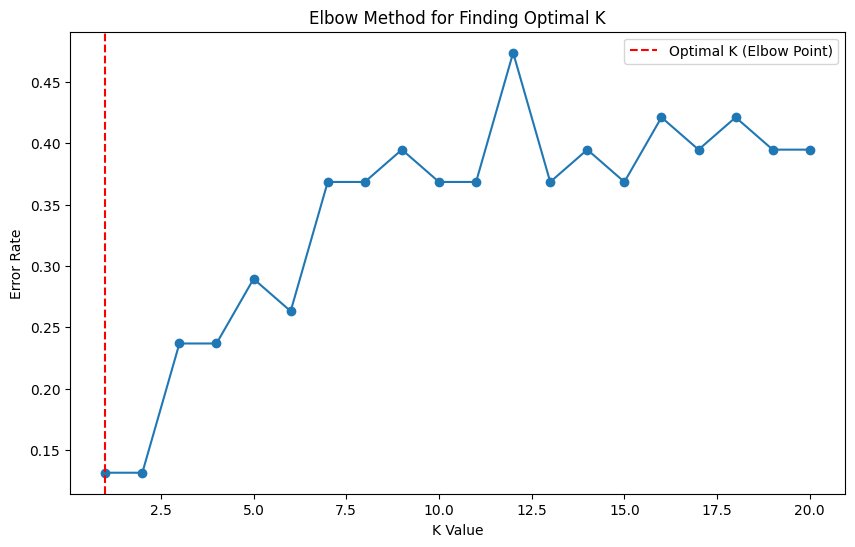

In [ ]:
#Plotting the optimal K through elbow method
plt.figure(figsize=(10,6))
plt.plot(k_values,error_rates,marker='o')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Finding Optimal K')
plt.axvline(x=best_k, color='red', linestyle='--', label='Optimal K (Elbow Point)')
plt.legend()
plt.show()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=best_k)
classifier.fit(A_train,b_train)
b_pred = classifier.predict(A_test)
b_train_pred = classifier.predict(A_train)
b_train_accuracy = accuracy_score(b_train,b_train_pred)
accuracy = accuracy_score(b_test,b_pred)
print(f'Training Accuracy of KNN with k={best_k}: {b_train_accuracy*100:.4f}%')
print(f'Accuracy of KNN with k={best_k}: {accuracy*100:.4f}%  ')


Training Accuracy of KNN with k=1: 100.0000%
Accuracy of KNN with k=1: 86.8421%  


In [ ]:
print(classification_report(b_test,b_pred))

               precision    recall  f1-score   support

  Brown Dwarf       1.00      1.00      1.00         7
Main Sequence       1.00      1.00      1.00         5
    Red Dwarf       0.91      0.71      0.80        14
   Supergiant       1.00      1.00      1.00         4
  White Dwarf       0.64      0.88      0.74         8

     accuracy                           0.87        38
    macro avg       0.91      0.92      0.91        38
 weighted avg       0.89      0.87      0.87        38



Q4: Eager Learner:Random forest

In [ ]:
#Our target variable is Star type and the two features we choose are Luminosity and Radius based on the mutual information provided above
#split dataset
C = df_no_outlier[['Luminosity (L/Lo)','Radius (R/Ro)']]
d = df_no_outlier['Star type']
C_train,C_test,d_train,d_test = train_test_split(C,d,random_state=42,test_size=0.2)

In [ ]:
C_train = scaler.fit_transform(C_train)
C_test = scaler.transform(C_test)

In [ ]:
rFClassifier = RandomForestClassifier(n_estimators=80,random_state=42)
rFClassifier.fit(C_train,d_train)
d_pred = rFClassifier.predict(C_test)
d_train_pred = rFClassifier.predict(C_train)
rfaccuracy = accuracy_score(d_test,d_pred)
training_accuracy = accuracy_score(d_train,d_train_pred)
print(f'Training Accuracy score = {training_accuracy * 100:.4f}%')
print(f'Accuracy score = {rfaccuracy * 100:.4f}%')

Training Accuracy score = 100.0000%
Accuracy score = 92.1053%


In [ ]:
print(classification_report(d_test,d_pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       1.00      0.79      0.88        14
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         4

    accuracy                           0.92        38
   macro avg       0.94      0.96      0.94        38
weighted avg       0.94      0.92      0.92        38



Q5: Hyperparameter Tuning for Random Forest

In [ ]:
# Smaller grid for faster computation
param_grid = {
    'n_estimators': [100, 200, 300],      # Reduced options
    'max_depth': [10, 20, None],          # Reasonable depth options
    'min_samples_split': [2, 5],          # Reduced options
    'min_samples_leaf': [1, 2],           # Reduced options
    'max_features': ['sqrt', 'log2', None]      # Keep this as is
}
# Create RandomizedSearchCV object (faster than GridSearchCV)
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=20,              # Test only 20 random combinations
    cv=3,                   # Use 3-fold CV instead of 5 for speed
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)
random_search.fit(C_train, d_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
best_rf = random_search.best_estimator_
d_pred = best_rf.predict(C_test)
d_train_pred = best_rf.predict(C_train)

tpaccuracy = accuracy_score(d_test,d_pred)
training_accuracy = accuracy_score(d_train,d_train_pred)

print(f'Training Accuracy score = {training_accuracy * 100:.4f}%')
print(f'Accuracy score = {tpaccuracy * 100:.4f}%')

Training Accuracy score = 100.0000%
Accuracy score = 89.4737%


Q6: Evaluation and confusion Matrics

In [ ]:
models = pd.DataFrame({
    'Model': ['K - Nearest Neighbors','Random Forest', 'Tuned Random Forest'],
    'Score': [accuracy, rfaccuracy,tpaccuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,0.921053
0,K - Nearest Neighbors,0.894737
2,Tuned Random Forest,0.894737


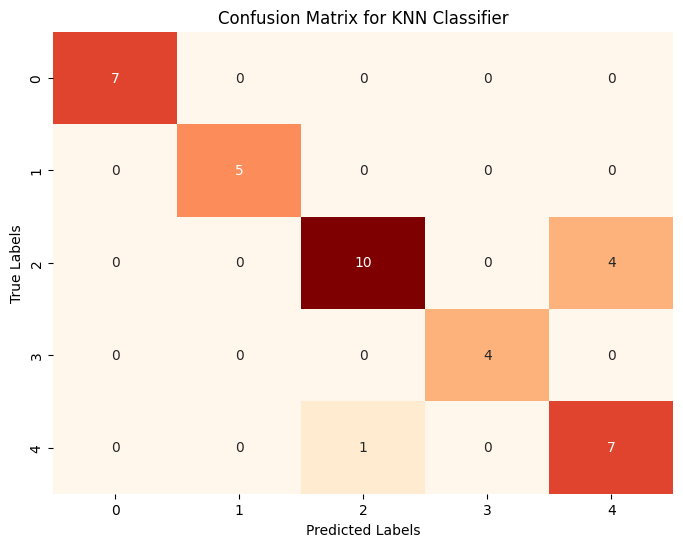

In [ ]:
#Actual vs predicted counts
cm = confusion_matrix(b_test,b_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='OrRd', cbar=False)
plt.title('Confusion Matrix for KNN Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

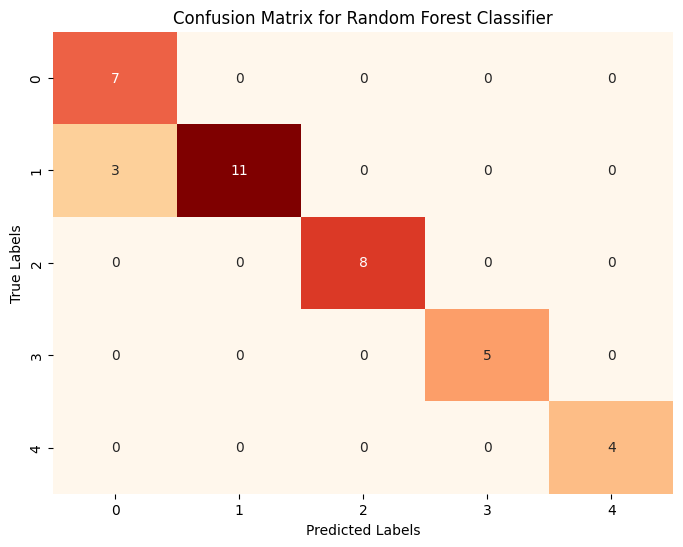

In [ ]:
rfcm = confusion_matrix(d_test,d_pred)
plt.figure(figsize=(8,6))
sns.heatmap(rfcm, annot=True, fmt='d', cmap='OrRd', cbar=False)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

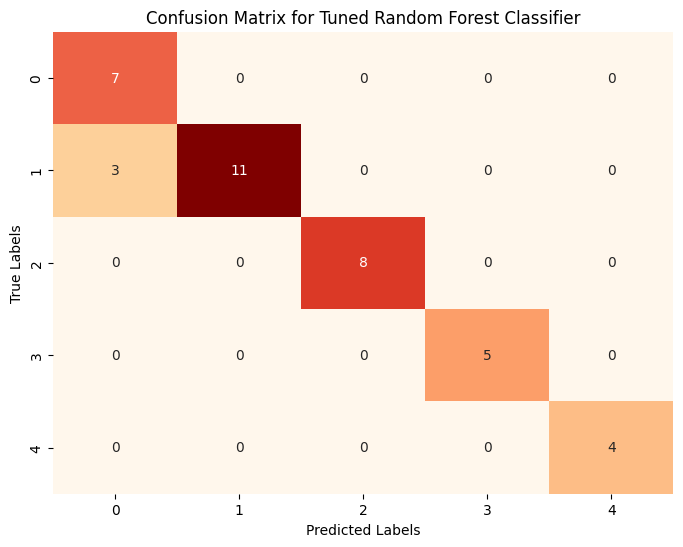

In [ ]:
#Confusion matrix
trfcm = confusion_matrix(d_test,d_pred)
plt.figure(figsize=(8,6))
sns.heatmap(trfcm, annot=True, fmt='d', cmap='OrRd', cbar=False)
plt.title('Confusion Matrix for Tuned Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()